Notebook: stock_price         Author: Anastasia Ruzmaikina

This notebook is about analyzing a stock price data set.


In this work we analyze a toy example of the stock price data given in the file "exercise_data.csv". We first check what kind of time series it is. After running many tests, we conclude that the time series is a Random Walk with uncorrelated increments. Then we do some further analysis on one-step differences of the original data set.

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import math

First we read the csv data file using read_csv

In [43]:
time = pd.read_csv('exercise_data.csv')

To analyze test data set “exercise_data.csv”, I first converted it into Pandas DataFrame, called “time”.  Here, you see what the first 5 rows and the last 5 rows of the time series look like. The second column is the time index and the third column is the stock price.

In [44]:
time

,time,value
0,1,100.0000
1,2,100.8800
2,3,101.2520
3,4,100.6990
4,5,100.7280
...,...,...
9995,9996,62.6623
9996,9997,62.4810
9997,9998,63.1266
9998,9999,62.5925


Now, we draw a graph of the time-series data. The plot of the data set “time” using MatplotLib is shown on “data1.pdf”.

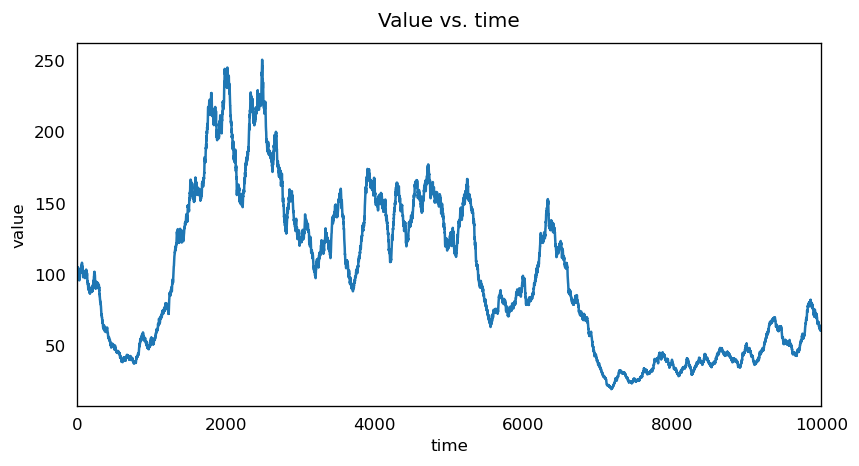

In [45]:
figure = plt.figure(figsize = (8,4))
subplot = plt.subplot()
x = time['time']
y = time['value']
subplot.set_title('Value vs. time')
subplot.set_xlabel('time')
subplot.set_xlim([0, 10000])
subplot.set_ylabel('value')
subplot.plot(x,y)
plt.savefig('data1.pdf')

We can draw a graph of values greater than the mean

The figure in “greater_than_mean.pdf” shows only the data points in the data set “time” which have values higher than the mean value of 98.194.

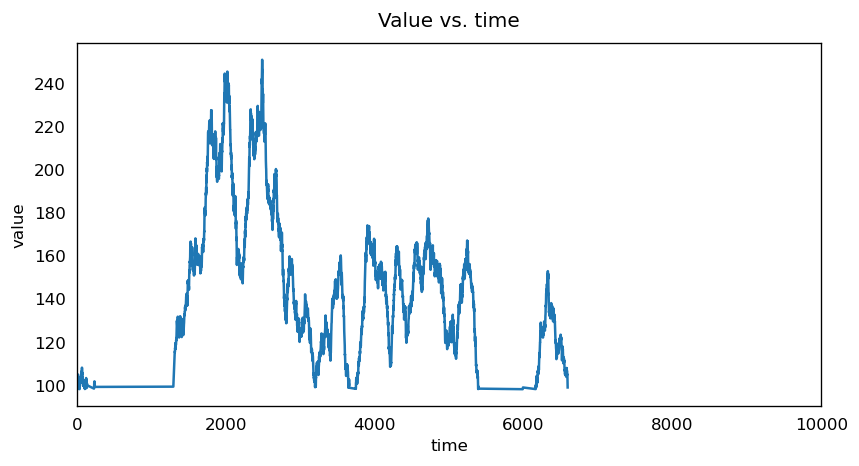

In [46]:
high_values = time[(time['value']) > 98.19]
figure = plt.figure(figsize = (8,4))
subplot = plt.subplot()
x = high_values['time']
y = high_values['value']
subplot.set_title('Value vs. time')
subplot.set_xlabel('time')
subplot.set_xlim([0, 10000])
subplot.set_ylabel('value')
subplot.plot(x,y)
plt.savefig('greater_than_mean.pdf')

The mean of the values of the data set is mean = 98.194, the standard deviation is std = 54.879, the maximum is max = 250.851, the minimum is min = 19.293
The five number summary is: (19.293, 45.858, 88.49, 141.732, 250.851)

In [47]:
time.mean()

time     5000.500000
value      98.194122
dtype: float64

In [48]:
time.std()

time     2886.895680
value      54.879001
dtype: float64

In [49]:
time.max()

time     10000.000
value      250.851
dtype: float64

In [50]:
time.min()

time      1.0000
value    19.2932
dtype: float64

The Probability Distribution of the values of the data set “time” is shown on “values_disribution1.png”. As you can see, the distribution is not Gaussian.

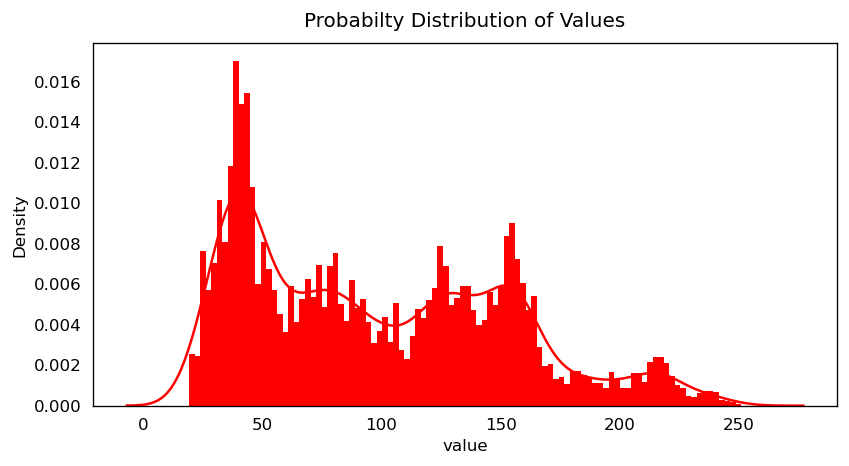

In [51]:
import scipy.stats as stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
figure = plt.figure(figsize = (8,4))
subplot = plt.subplot()
subplot.set_title('Probabilty Distribution of Values')
ax=sns.distplot(time['value'], bins=100, kde=True, color='red', hist_kws={'linewidth':15, 'alpha':1})
plt.savefig('values_distribution1')
plt.show()

To test the time series for stationarity, I used ADF test and KPSS test.

In the ADF test, the Null Hypothesis is that the time series is not stationary. The Null Hypothesis should be rejected if p-value is less than 0.05. I ran the ADF test using adfuller from statsmodels library, and obtained p-value = 0.2746 > 0.05. Since p-value is greater than 0.05, I did not reject the Null Hypothesis that the time series is not stationary.

In [52]:
from statsmodels.tsa.stattools import adfuller, kpss
#ADF Test == Null Hypothesis is that time-series is non-stationary, reject Null Hypothesis if p-value < 0.05
result = adfuller(time.value.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critical Values:')
    print(f' {key}, {value}')

ADF Statistic: -2.027599708472383
p-value: 0.2746042155248498
Critical Values:
 1%, -3.4310066595695945
Critical Values:
 5%, -2.861830204343065
Critical Values:
 10%, -2.5669244706354584


In the KPSS test, the Null Hypothesis is that the series is stationary. The Null Hypothesis should be rejected if the p-value is less than 0.05. I ran the KPSS test using kpss from statsmodels library, and obtained p-value = 0.01 < 0.05.
Since p-value is less than 0.05, I rejected the Null Hypothesis that time series is stationary, and accepted the Alternative Hypothesis that the time series is not stationary.

In [53]:
#KPSS test == used to trst for trend stationarity, Null hypothesis is that series is stationary
import warnings
warnings.filterwarnings('ignore')
result = kpss(time.value.values, regression = 'c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critical Values:')
    print(f' {key}, {value}')


KPSS Statistic: 10.566143
p-value: 0.010000
Critical Values:
 10%, 0.347
Critical Values:
 5%, 0.463
Critical Values:
 2.5%, 0.574
Critical Values:
 1%, 0.739


In conclusion, both ADF and KPSS tests point to the time series “time” to be non-stationary.

Next, I tried to detrend the time series.

First, I subtracted the linear regression line from the time series using signal.detrend from scipy library. The result is shown on “detrended.pdf”. As you can see, the graph changed very little, except now being centered around the mean=0.

Next, I estimated the period of the oscillations on the graph to be about 500, and tried to subtract the seasonal oscillation of 500 from the graph. I used seasonal_decompose from statsmodels library. The result is shown on “subtract_trend.pdf”. As you can see, the trend of a period 500 (shown in blue) describes the shape of the graph accurately, and once the trend is subtracted from the time series, the remaining detrended series shown in orange, look like noisy data.

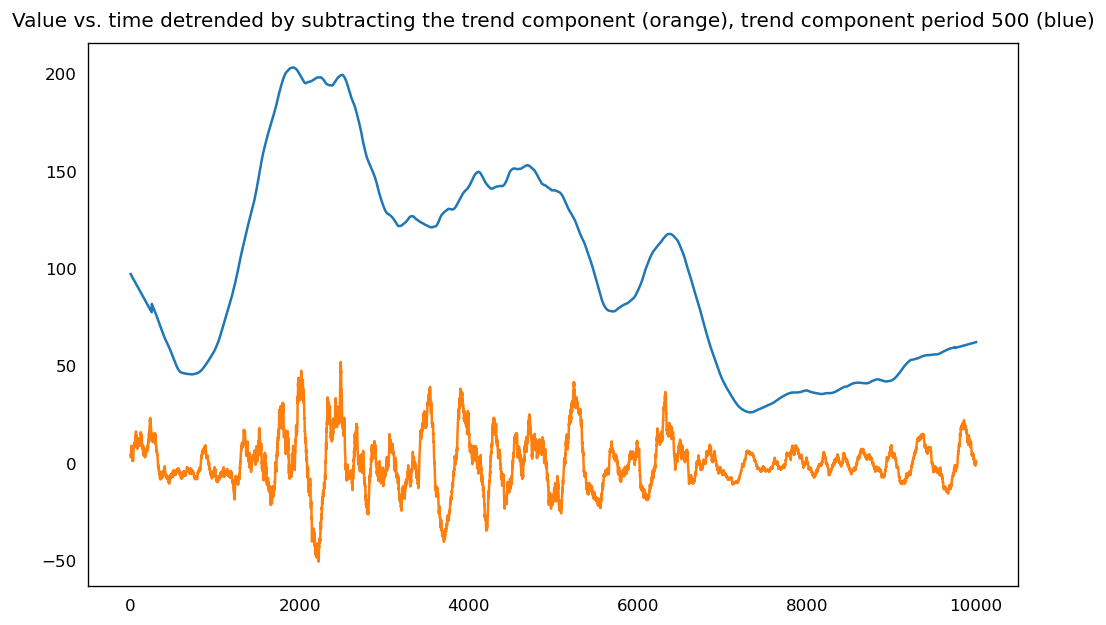

In [54]:
from statsmodels.tsa.seasonal import seasonal_decompose
result_mul = seasonal_decompose(time['value'], model='multiplicative', extrapolate_trend='freq', period = 500)
plt.plot(result_mul.trend)
detrended = time.value.values - result_mul.trend
plt.plot(detrended)
#plt.legend('blue = trend', 'orange = detrended')
plt.title('Value vs. time detrended by subtracting the trend component (orange), trend component period 500 (blue)')
plt.savefig('subtract_trend1.pdf')

Next, we use autocorrelation_plot from pandas to graph the autocorrelations of the time series "time".

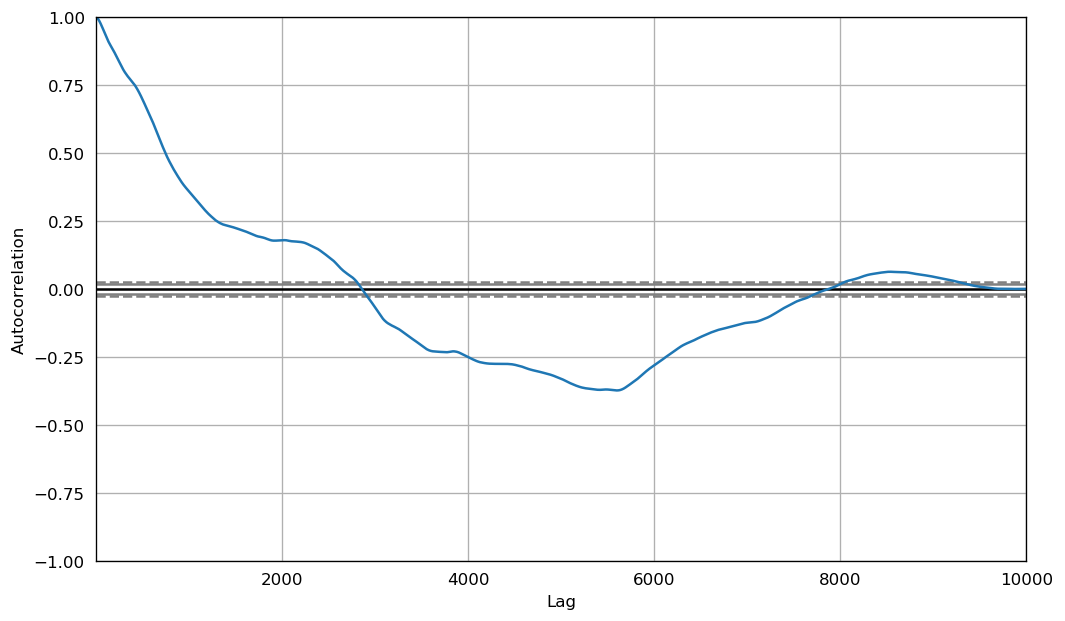

In [55]:
from pandas.plotting import autocorrelation_plot
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':120})
autocorrelation_plot(time.value.tolist())
plt.savefig('autocorrelation1.pdf')

Next, I used acf, pacf from statsmodels to find autocorrelation functions and partial autocorrelation functions. The results are shown on “correlation.pdf”.

The left graph shows ACF for the first 100 lags, the right graph shows PACF for the first 100 lags. As can be seen from the graphs, and from the arrays printed out with the graphs, the auto-regression equation is

Y(t) = 0.999862 Y(t-1) + lower order terms + noise.

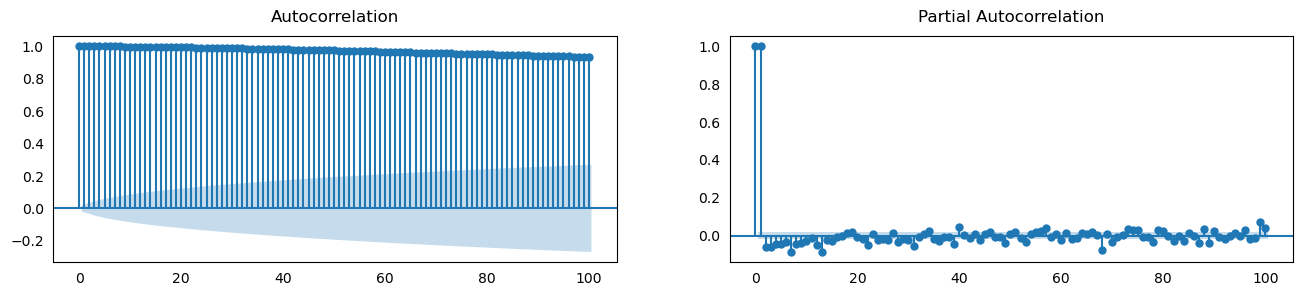

In [56]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')
#calculate acf, pacf for up to 50 lags
acf_50 = acf(time.value, nlags = 50)
pacf_50 = pacf(time.value, nlags = 50)
fig, axes = plt.subplots(1,2, figsize=(16,3), dpi = 100)
plot_acf(time.value.tolist(), lags=100, ax=axes[0])
plot_pacf(time.value.tolist(), lags=100, ax=axes[1])
plt.savefig('correlation1.pdf')

Using the data set “time”, I did the lag plots with lag = 1, 2, 3, 4.
I used lag_plot from pandas. The results are shown on “lagplots1.pdf”.
As you can see, consistently with acf, pacf results for time series “time”, the lag plots show that y(t+1) is predicted almost perfectly by y(t).

(On small time scales the series is predictable, this predictability breaks down on long time scales.)

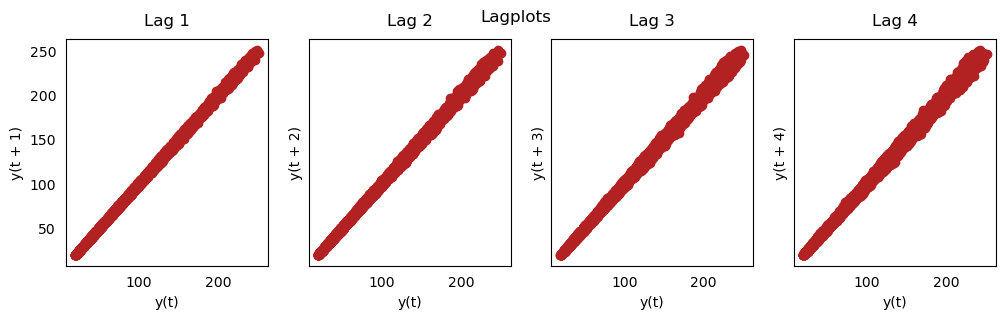

<Figure size 1200x720 with 0 Axes>

In [59]:
#Lag plots
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left': False, 'axes.titlepad':10})
fig, axes = plt.subplots(1, 4, figsize=(12,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(time.value, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag '+ str(i+1))
fig.suptitle('Lagplots')
plt.show()
plt.savefig('lagplots1.pdf')
#Conclusion: the series is autocorrelated. (White noise gives scattered lag plots)

Repeating the same exercise but with lag = 100, 200, 300, 400, I observed that the time series “time” becomes a lot less autocorrelated after more than 100 time steps. See figure “lagplots1_100.pdf”.

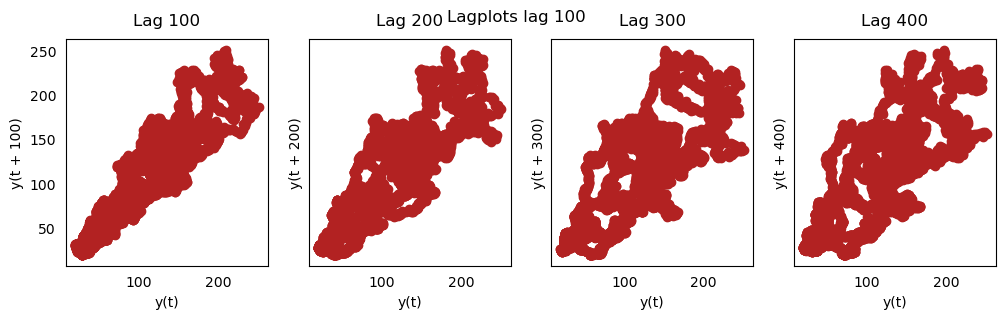

In [60]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left': False, 'axes.titlepad':10})
fig, axes = plt.subplots(1, 4, figsize=(12,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(time.value, lag=100*(i+1), ax=ax, c='firebrick')
    ax.set_title('Lag '+ str(100*(i+1)))
fig.suptitle('Lagplots lag 100')
plt.savefig('lagplots1_100.pdf')
plt.show()
#Conclusion: the series is less autocorrelated after 100 to 400 steps, due to noise.
#(White noise gives scattered lag plots)

Another way to estimate predictability of the series is to look at approximate entropy, derived to approximate Sinai-Kolmogorov entropy of a probability distribution.

It can be calculated that the approximate entropy of the data set “time” is 0.0395. By contrast, an approximate entropy of a set of 136 random integers is 0.685. The small approximate entropy of the data set “time” points to its short term predictability. 

In [61]:
import random
import numpy as np
rand_small = np.random.randint(0, 100, size=36)
rand_big = np.random.randint(0, 100, size=136)
def ApEn(U, m, r):
    """ Compute Approximate Entropy """
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])
    
    def _phi(m):
        x = [[U[j] for j in range(i, i+m-1+1)] for i in range(N-m+1)]
        C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r])/ (N-m+1.0) for x_i in x]
        return (N-m+1.0)**(-1) * sum(np.log(C))
        
    N = len(U)
    return abs(_phi(m+1) - _phi(m))
    
print(ApEn(time.value, m=2, r = 0.2 * np.std(time.value)))
print(ApEn(rand_small, m=2, r = 0.2 * np.std(rand_small)))
print(ApEn(rand_big, m=2, r = 0.2 * np.std(rand_big)))

0.03945576832625752
0.15261553914663306
0.6047991523468994


0.03945576832625752   -- entropy of the time series, low entropy means that the seiries is more predictable, it has repetative patterns of fluctuations 

0.15261553914663306  -- entropy of a small set of random numbers (high)

0.6047991523468994   -- entropy of a large set of random numbers (high)

Next, I tried smoothing the time series, using moving averages as well as Loess smoothing. The results are shown on “smoothing1.pdf”.

Smoothing the time series:

Take a moving average - rolling a window of a certain width. As you can see, the series retains its shape when smoothed by the rolling window of moving averages of width 300 (using 300 nearby datapoints). 

Do a LOESS smoothing (localized regression) - use a regression using specified % of nearby points

Do a LOWESS smoothing (locally weighted regression) - use a regression using a specified % of nearby points

The time series "time" also looks approximately the same when smoothed by Loess smoothing using 5% (i.e. 500) of nearby points. Even after Loess smoothing by using 15% (i.e. 1500) nearby points, the time series “time” looks approximately the same.

In conclusion: the time series “time” exhibits a strong short-term predictability and resembles a random walk. Due to noise, the predictability of time series “time” decreases significantly after 400 time steps.

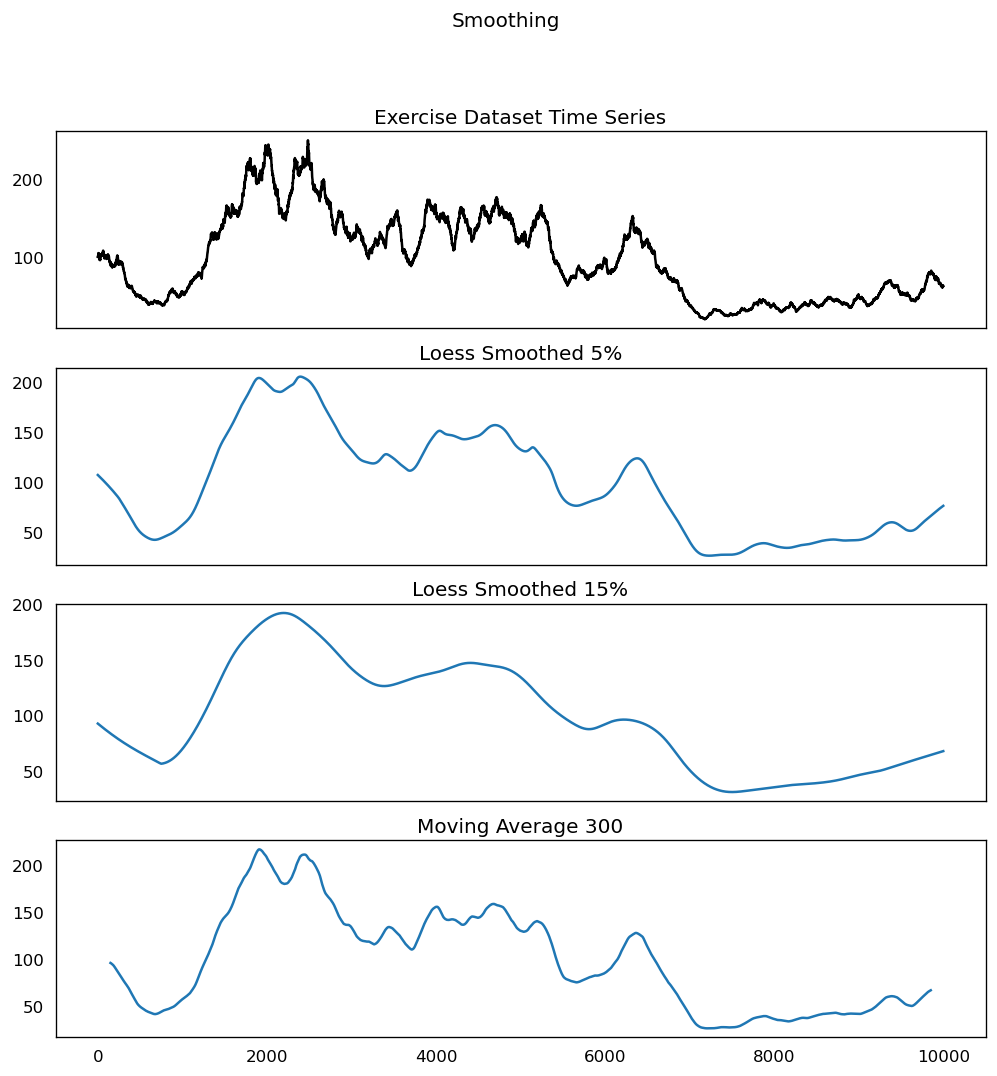

In [62]:
from statsmodels.nonparametric.smoothers_lowess import lowess
plt.rcParams.update({'xtick.bottom' : False, 'axes.titlepad':5})
#Moving Average
time_ma = time.value.rolling(300, center=True, closed='both').mean()
#Loess Smoothing (5% and 15%)
time_loess_5 = pd.DataFrame(lowess(time.value, np.arange(len(time.value)), frac = 0.05)[:,1], index = time.index, columns=['value'])
time_loess_15 = pd.DataFrame(lowess(time.value, np.arange(len(time.value)), frac = 0.15)[:,1], index = time.index, columns=['value'])
#Plot
fig, axes = plt.subplots(4, 1, figsize=(10,10), sharex=True, dpi=120)
time['value'].plot(ax=axes[0], color='k', title='Exercise Dataset Time Series')
time_loess_5['value'].plot(ax=axes[1], title='Loess Smoothed 5%')
time_loess_15['value'].plot(ax=axes[2], title='Loess Smoothed 15%')
time_ma.plot(ax=axes[3], title='Moving Average 300')
fig.suptitle('Smoothing')
plt.savefig('smoothing1.pdf')
plt.show()

This suggests taking differences Y(t)-Y(t-1) and constructing a time series consisting of one step differences of nearby values. Using diff( ) in pandas, I construct a new time series called “difference”. The resulting series is shown on “One_step_differences1.pdf”. 

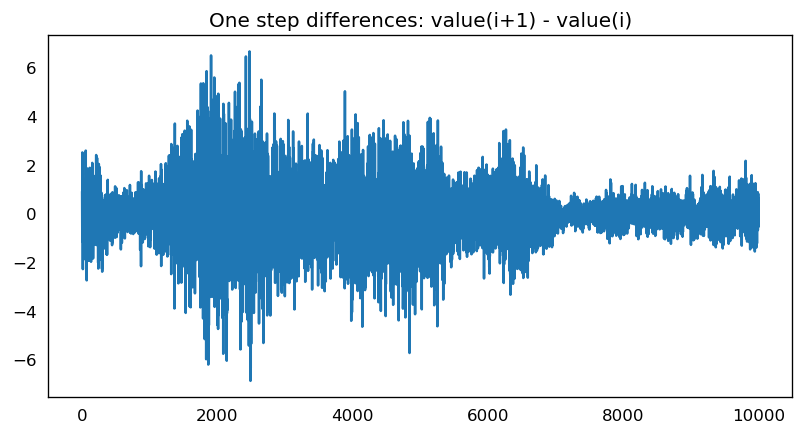

In [63]:
#create differences within Values column
import pandas as pd
difference = time['value'].diff().dropna()
figure = plt.figure(figsize = (8,4))
subplot = plt.subplot()
subplot.plot(difference)
subplot.set_title('One step differences: value(i+1) - value(i)')
plt.savefig('One_step_differences1.pdf')

Next, I did acf and pacf analysis on “difference” time series. The result is shown on “correlation_for_differences.pdf”. As you can see, the ACF are close to zero, which is a signature of white noise. 

The acf, pacf analysis suggests that the original data set “time” exhibits random-walk like behavior. 

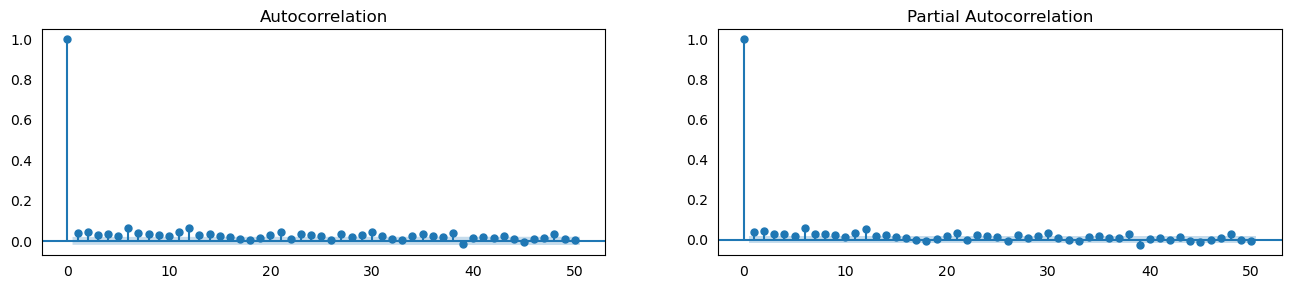

In [64]:
#acf and pacf
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#calculate acf, pacf for up to 50 lags
acf_diff_50 = acf(difference, nlags = 50)
pacf_diff_50 = pacf(difference, nlags = 50)
fig, axes = plt.subplots(1,2, figsize=(16,3), dpi = 100)
plot_acf(difference.tolist(), lags=50, ax=axes[0])
plot_pacf(difference.tolist(), lags=50, ax=axes[1])
plt.savefig('correlation_for_differences1.pdf')
#Conclusion: after calculating 1-step differences, the series becomes white noise
#because it is know that for white noice ACF is close to zero

I then ran the tests to check for stationarity of the time series “difference”.

The ADF Test gave p-value = 0 < 0.05, so I rejected the Null Hypothesis that the time series “difference” is non-stationary and concluded that the series is stationary.

The KPSS Test gave p-value = 0.1 > 0.05, so I did not reject the Null Hypothesis that the time series “difference” is stationary.
In conclusion, both ADF and KPSS tests confirm that the time series of 1-step differences is stationary.

In [65]:
from statsmodels.tsa.stattools import adfuller, kpss
#ADF Test == Null Hypothesis is that time-series is non-stationary, reject Null Hypothesis if p-value < 0.05
result = adfuller(difference[1:].values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critical Values:')
    print(f' {key}, {value}')

ADF Statistic: -12.126046138123273
p-value: 1.7797511233673282e-22
Critical Values:
 1%, -3.4310067914762
Critical Values:
 5%, -2.8618302626314684
Critical Values:
 10%, -2.5669245016624593


In [67]:
#KPSS test == used to test for trend stationarity, Null hypothesis is that series is stationary
import warnings
warnings.filterwarnings('ignore')
result = kpss(difference[1:].values, regression = 'c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critical Values:')
    print(f' {key}, {value}')


KPSS Statistic: 0.097067
p-value: 0.100000
Critical Values:
 10%, 0.347
Critical Values:
 5%, 0.463
Critical Values:
 2.5%, 0.574
Critical Values:
 1%, 0.739


To confirm that the differences are white noise, I plotted the distribution of the time series of 1-step differences. The graph shown on “differences_distribution.pdf”, clearly shows that the differences have a gaussian distribution with mean = - 0.00377 and standard deviation std = 1.14194. 

This leads me to the conclusion that the time series of 1-step differences is a series of a Random Walk increments and therefore the original time series given as “exercise_data.csv” is the distance of a Random Walk from some initial point (B(0)=100).

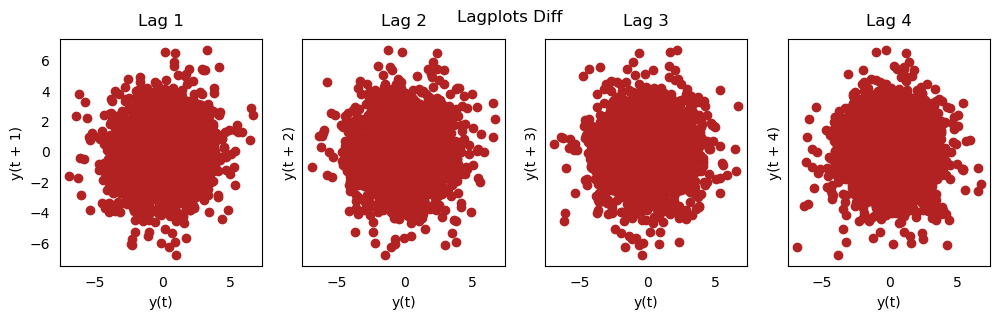

In [68]:
#Lag plots
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left': False, 'axes.titlepad':10})
fig, axes = plt.subplots(1, 4, figsize=(12,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(difference[1:], lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag '+ str(i+1))
fig.suptitle('Lagplots Diff')
plt.savefig('lagplots_difference1.pdf')
plt.show()
#Conclusion: the series is not autocorrelated and looks like white noise. (White noise gives scattered lag plots)

To see the probability distribution of one step differences given by the time series "difference", I graph the probability distribution. It has a Gaussian-like shape.

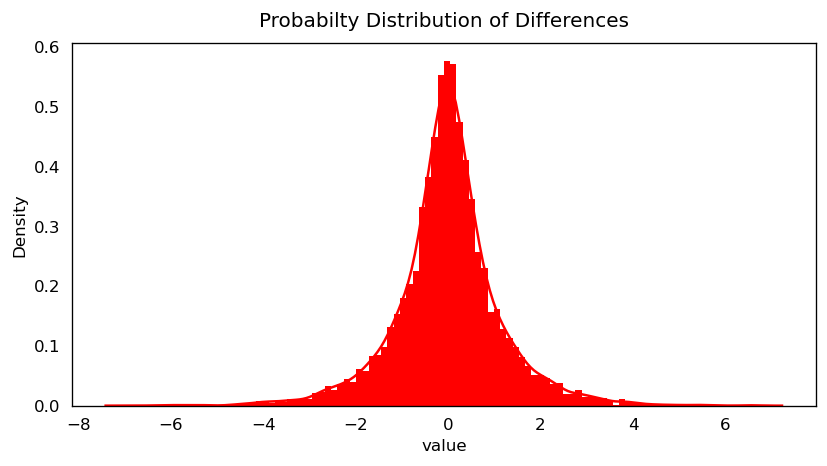

In [69]:
import scipy.stats as stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
figure = plt.figure(figsize = (8,4))
subplot = plt.subplot()
subplot.set_title('Probabilty Distribution of Differences')
ax=sns.distplot(difference, bins=100, kde=True, color='red', hist_kws={'linewidth':15, 'alpha':1})
plt.savefig('differences_distribution1.pdf')
plt.show()

We calculate the mean and satdard deviation of the time series "difference".

In [70]:
difference.mean()

-0.0037683468346834652

In [71]:
difference.std()

1.14193607888219

<Figure size 1200x960 with 0 Axes>

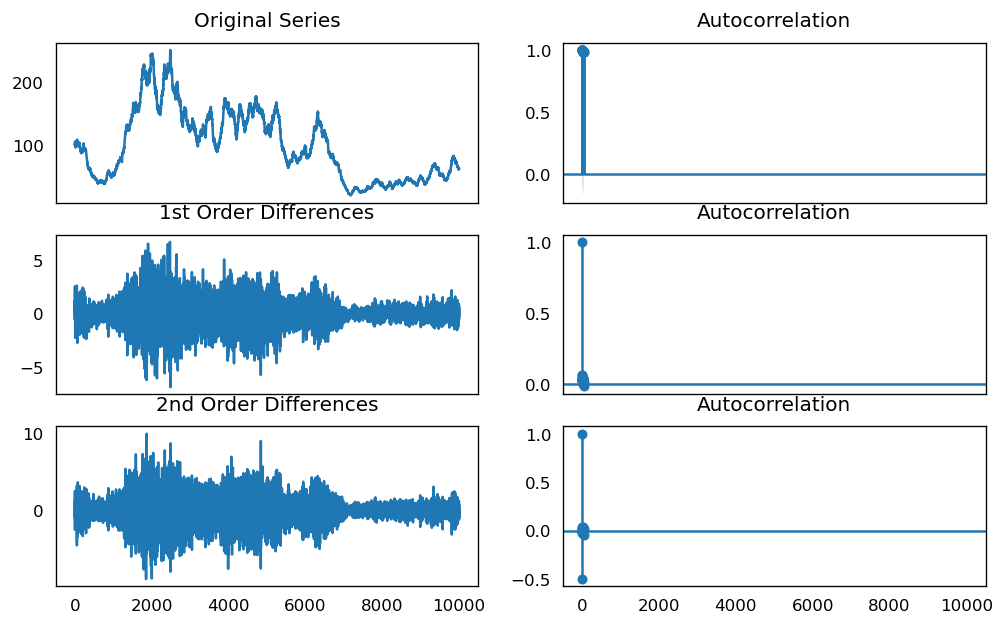

In [72]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
figure = plt.figure(figsize = (10,8))
plt.rcParams.update({ 'figure.dpi':120})
fig, axes = plt.subplots(3, 2, sharex=True)
#Original series
axes[0,0].plot(time.value);
axes[0,0].set_title('Original Series')
plot_acf(time.value, ax = axes[0,1])
# 1 step differences
axes[1,0].plot(time.value.diff());
axes[1,0].set_title('1st Order Differences')
plot_acf(time.value.diff().dropna(), ax = axes[1,1])
#2nd order differences
axes[2,0].plot(time.value.diff().diff());
axes[2,0].set_title('2nd Order Differences')
plot_acf(time.value.diff().diff().dropna(), ax=axes[2,1])
plt.savefig('original1, 1st order diff, 2nd order diff')
plt.show()

Next, I repeat the adf, kpss and pp tests to figure out if one-step (or n step differences) should be used, using the ndiff module. The conclusion is that one-step differences must be used.

In [73]:
from pmdarima.arima.utils import ndiffs
y=time.value
#ADF Test
ndiffs(y, test='adf')
#KPSS Test
ndiffs(y, test='kpss')
#PP Test
ndiffs(y, test='pp')
#Out[112]: 1

1

Here, I give a more precise plot for Partial Autocorrelation Functions (pacf) of one-step differences. As can be seen from the graph, the values of pacf are very small, less than 0.06

<Figure size 1200x960 with 0 Axes>

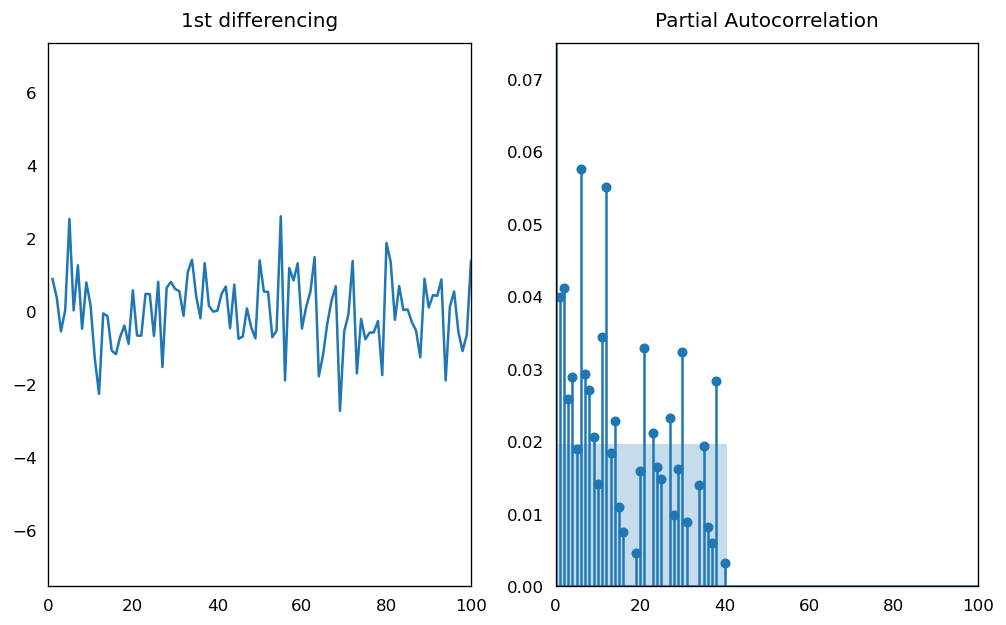

In [74]:
#PACF Plot of 1st differenced series
figure = plt.figure(figsize = (10,8))
plt.rcParams.update({ 'figure.dpi':120})
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(time.value.diff());
axes[0].set_title('1st differencing')
axes[1].set(xlim=(0,100), ylim=(0,0.075))
plot_pacf(time.value.diff().dropna(), ax = axes[1])
plt.savefig('1st differences, pacf1')
plt.show()

Here is a more precise Auto Correlation Function plot (acf) for one-step differences. As can be seen from the graph, the values of acf are very small, less than 0.07

<Figure size 1200x960 with 0 Axes>

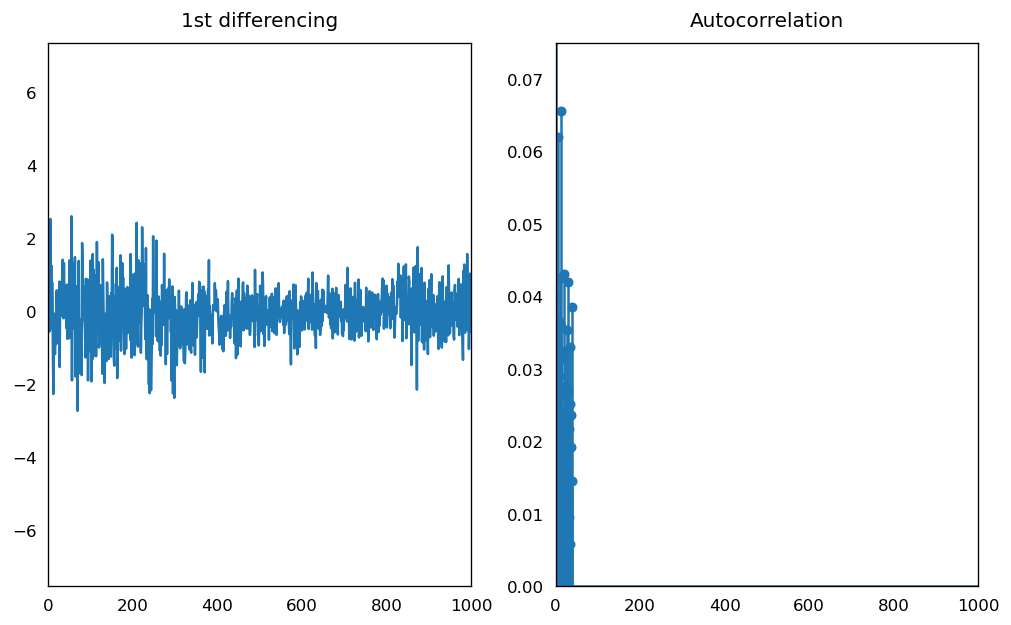

In [75]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
figure = plt.figure(figsize = (10,8))
plt.rcParams.update({ 'figure.dpi':120})
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(time.value.diff());
axes[0].set_title('1st differencing')
axes[1].set(xlim=(0,1000), ylim=(0,0.075))
plot_acf(time.value.diff().dropna(), ax = axes[1])
plt.savefig('1st differences, acf1')
plt.show()

The analysis done by ARIMA confirms that the time series "time" is of the form Y(t+1) = Y(t) + noise, therefore one-step differences must be considered.

In [29]:
from statsmodels.tsa.arima_model import ARIMA
# 1,1,0 ARIMA model
model=ARIMA(time.value, order=(1,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                 9999
Model:                 ARIMA(1, 1, 0)   Log Likelihood              -15506.625
Method:                       css-mle   S.D. of innovations              1.141
Date:                Sun, 17 Jul 2022   AIC                          31019.250
Time:                        16:50:01   BIC                          31040.881
Sample:                             1   HQIC                         31026.572
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0038      0.012     -0.317      0.751      -0.027       0.020
ar.L1.D.value     0.0399      0.010      3.992      0.000       0.020       0.059
                                    Root

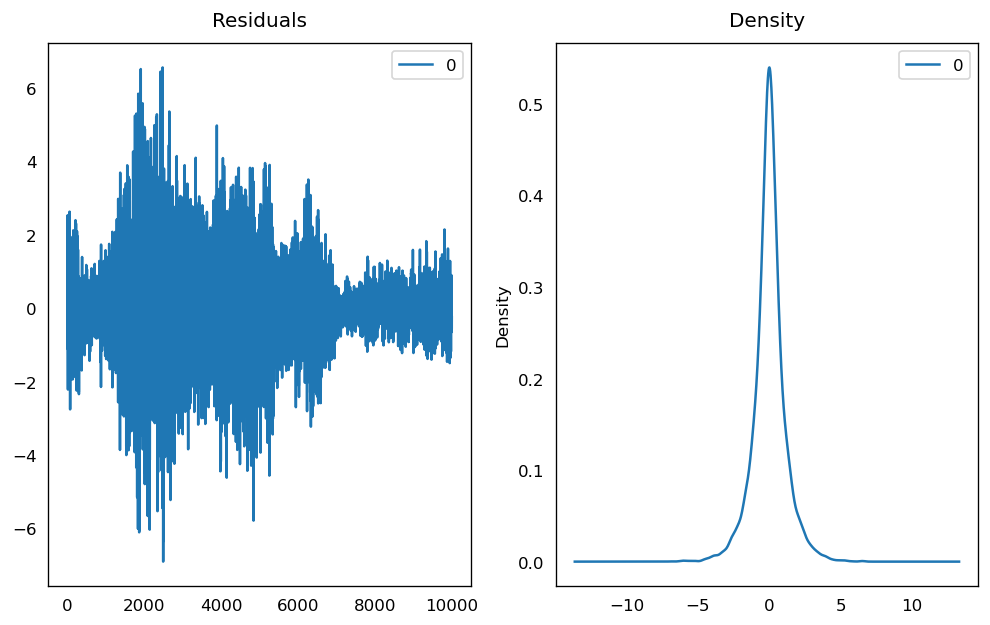

In [76]:
#Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1, 2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.savefig('residuals1')
plt.show()

We can use Arima model to predict the future of the time series "time" after training the time series on the first 7000 steps.

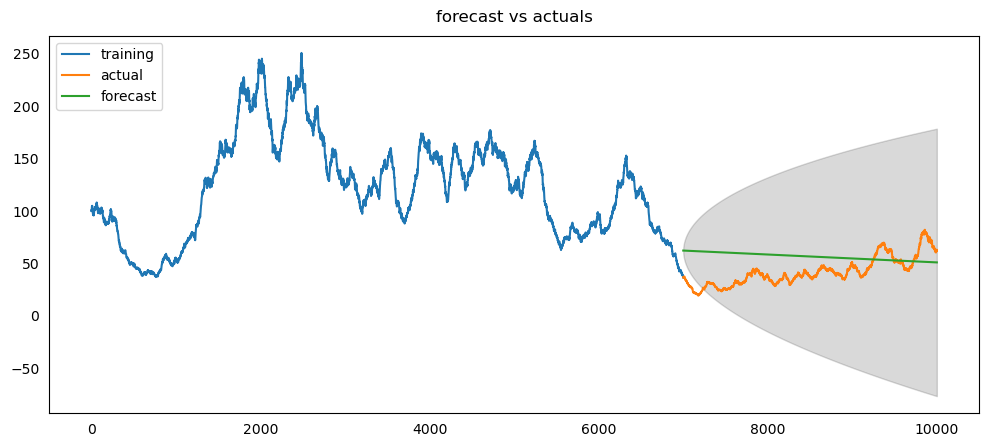

In [77]:
from statsmodels.tsa.stattools import acf
train = time.value[:7000]
test = time.value[7000:]
#build model
#model = ARIMA(train, order=(1,1,1))
fitted = model.fit(disp=-1)
#forecast
fc, se, conf = fitted.forecast(3000, alpha=0.05)
#95% confidence level
#make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:,0], index=test.index)
upper_series = pd.Series(conf[:,1], index=test.index)
# plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=0.15)
plt.title('forecast vs actuals')
plt.legend(loc='upper left', fontsize=10)
plt.savefig('forecast1.pdf')
plt.show()

The Fitter method guesses the distribution of the one step differences.

The output are all the distributions which are closest the the empirical cumulative probability distribution of the data set.

,sumsquare_error,aic,bic,kl_div
laplace_asymmetric,0.010093,950.378968,-138004.846830,inf
laplace,0.010170,948.387297,-137938.757733,inf
gennorm,0.010942,930.795067,-137197.397677,inf
norminvgauss,0.014867,899.612162,-134123.739598,inf
t,0.031721,894.637259,-126556.078246,inf


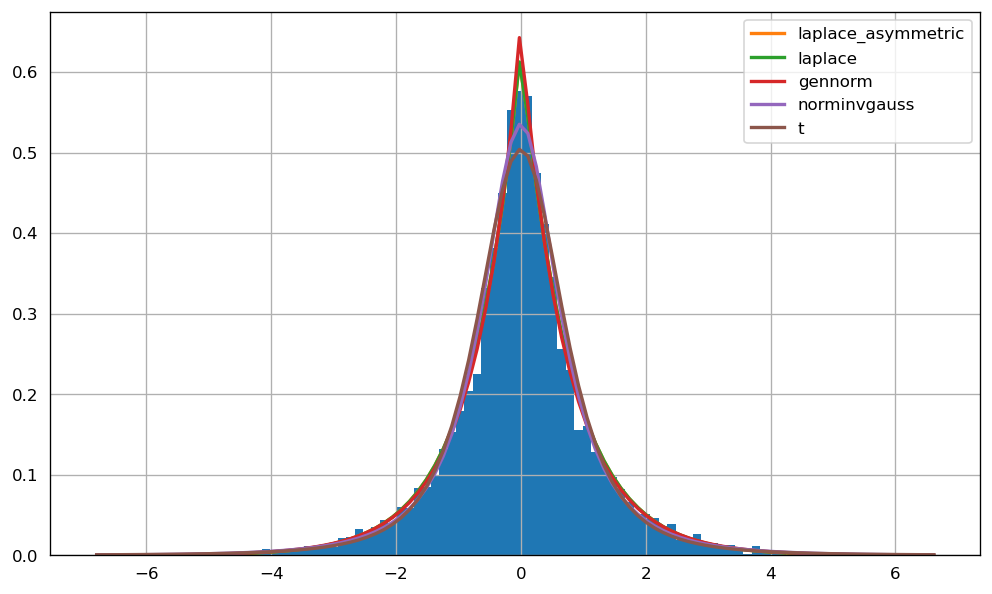

In [78]:
from fitter import Fitter
import warnings
warnings.filterwarnings('ignore')
import logging
logging.getLogger().setLevel(logging.ERROR)
f = Fitter(difference[1:])
f.fit()
f.summary()

The distribution of one step differences looks Gaussian, but to know if that is the case, we need to tun Shapiro-Wilks test. If the p-value of Shapiro-Wilks test is greater than 0.05, we cannot say that the distribution is non-Gaussian, if less than 0.05 it is not Gaussian.

In [79]:
import numpy as np
from scipy import stats
rng = np.random.default_rng()
x = difference
shapiro_test = stats.shapiro(x[1:])
shapiro_test

ShapiroResult(statistic=0.9553021192550659, pvalue=0.0)

Here we can say with certainty that the distribution of one step differences is not Gaussian.

In conclusion, we analyzed the time series "time" and discovered that it has a form Y(t+1) = Y(t) + noise. Therefore it is prudent to do further analysis on the time series "difference" consisting of one-step differences of the time series "time".

The time series "difference" is uncorrelated. The distribution is not Gaussian.

Therefore we conclude that the original time series "time" is a Random Walk with uncorrelated steps.

This work is done by Anastasia Ruzmaikina.